# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import plotly.express as px
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
vehicles_df = pd.read_csv('data/vehicles.csv')

In [4]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
vehicles_df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [7]:
vehicles_df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [8]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
for col in vehicles_df.columns.tolist():
    pprint(f"++++++++++++++++++ {col} ++++++++++++++++++")
    pprint(f"{vehicles_df[col].unique()} : {vehicles_df[col].nunique()} : {vehicles_df[col].dropna().shape[0]}")
    print()

'++++++++++++++++++ id ++++++++++++++++++'
('[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129] : '
 '426880 : 426880')

'++++++++++++++++++ region ++++++++++++++++++'
("['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'\n"
 " 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'\n"
 " 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'\n"
 " 'dothan' 'florence / muscle shoals' 'gadsden-anniston'\n"
 " 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'\n"
 " 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'\n"
 " 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'\n"
 " 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'\n"
 " 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'\n"
 " 'humboldt county' 'imperial county' 'inland empire' 'los angeles'\n"
 " 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'\n"
 " 'palm spr

"[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage'] : 6 : 252776"

'++++++++++++++++++ cylinders ++++++++++++++++++'
("[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'\n"
 " '3 cylinders' '10 cylinders' '12 cylinders'] : 8 : 249202")

'++++++++++++++++++ fuel ++++++++++++++++++'
"[nan 'gas' 'other' 'diesel' 'hybrid' 'electric'] : 5 : 423867"

'++++++++++++++++++ odometer ++++++++++++++++++'
'[    nan  57923.  71229. ... 172511.  94964.  26892.] : 104870 : 422480'

'++++++++++++++++++ title_status ++++++++++++++++++'
"[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only'] : 6 : 418638"

'++++++++++++++++++ transmission ++++++++++++++++++'
"[nan 'other' 'automatic' 'manual'] : 3 : 424324"

'++++++++++++++++++ VIN ++++++++++++++++++'
("[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' ... '2HGES15535H620534'\n"
 " '1FDWF37P64EA24868' 'SAJGX2749VCOO8376'] : 118246 : 265838")

'++++++++++++++++++ drive ++++++++++++++++++'
"[nan 'rwd' '4wd' 'fwd'] : 3 : 296313

In [10]:
min_price_string = "${:,.2f}".format(vehicles_df["price"].min())
max_price_string = "${:,.2f}".format(vehicles_df["price"].max())

print("lowest car price " + min_price_string + " highest car price " + max_price_string)

lowest car price $0.00 highest car price $3,736,928,711.00


In [11]:
min_milage_string = "{:,.0f}".format(vehicles_df["odometer"].min())
max_milage_string = "{:,.0f}".format(vehicles_df["odometer"].max())
print("lowest car mileage " + min_milage_string + " highest car mileage " + max_milage_string)

lowest car mileage 0 highest car mileage 10,000,000


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [12]:
vehicles_dropna_df = vehicles_df.dropna()
vehicles_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [13]:
vehicles_dropna_df.describe()

id          price          year      odometer
count  3.486800e+04   34868.000000  34868.000000  3.486800e+04
mean   7.311508e+09   15837.446771   2011.176867  1.073991e+05
std    4.299751e+06   13460.056823      7.162332  9.990878e+04
min    7.301592e+09       0.000000   1905.000000  0.000000e+00
25%    7.308189e+09    6500.000000   2008.000000  6.516400e+04
50%    7.312225e+09   12000.000000   2013.000000  1.040000e+05
75%    7.315136e+09   22003.500000   2016.000000  1.411678e+05
max    7.317099e+09  155000.000000   2022.000000  9.999999e+06

In [14]:
#vehicles_dropna_df["model_year"] = vehicles_dropna_df["year"].astype(np.int64)
vehicles_dropna_df["model_year"] = pd.to_datetime(vehicles_dropna_df["year"], format='%Y').dt.year
vehicles_dropna_df = vehicles_dropna_df.drop("year",1)
vehicles_dropna_df.head()

id      region  price manufacturer              model  condition  \
126  7305672709      auburn      0    chevrolet  express cargo van   like new   
127  7305672266      auburn      0    chevrolet  express cargo van   like new   
128  7305672252      auburn      0    chevrolet  express cargo van   like new   
215  7316482063  birmingham   4000       toyota               echo  excellent   
219  7316429417  birmingham   2500          bmw               525i       fair   

       cylinders fuel  odometer title_status transmission                VIN  \
126  6 cylinders  gas   68472.0        clean    automatic  1GCWGAFP8J1309579   
127  6 cylinders  gas   69125.0        clean    automatic  1GCWGAFP4K1214373   
128  6 cylinders  gas   66555.0        clean    automatic  1GCWGAFPXJ1337903   
215  4 cylinders  gas  155000.0        clean    automatic  JTDBT123520243495   
219  6 cylinders  gas  110661.0        clean    automatic  WBAHD6322SGK86772   

    drive       size   type paint_color state  model_year  
126   rwd  full-size    van       white    al        2018  
127   rwd  full-size    van       white    al        2019  
128   rwd  full-size    van       white    al        2018  
215   fwd    compact  sedan        blue    al        2002  
219   rwd   mid-size  sedan       white    al        1995

In [15]:
for col in vehicles_dropna_df.columns.tolist():
    pprint(f"++++++++++++++++++ {col} ++++++++++++++++++")
    pprint(f"{vehicles_dropna_df[col].unique()} : {vehicles_dropna_df[col].nunique()}")
    print()

'++++++++++++++++++ id ++++++++++++++++++'
('[7305672709 7305672266 7305672252 ... 7303112347 7302338378 7302301268] : '
 '34868')

'++++++++++++++++++ region ++++++++++++++++++'
("['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'\n"
 " 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'\n"
 " 'tuscaloosa' 'anchorage / mat-su' 'kenai peninsula' 'southeast alaska'\n"
 " 'flagstaff / sedona' 'mohave county' 'phoenix' 'prescott' 'show low'\n"
 " 'tucson' 'yuma' 'fayetteville' 'fort smith' 'jonesboro' 'little rock'\n"
 " 'texarkana' 'bakersfield' 'chico' 'fresno / madera' 'gold country'\n"
 " 'humboldt county' 'imperial county' 'inland empire' 'los angeles'\n"
 " 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'\n"
 " 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'\n"
 " 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'\n"
 " 'siskiyou county' 'stockton' 'susanville' 'ventura county'\n"
 " 'visalia-tulare' 'yuba-sutter' '

In [16]:
vehicles_dropna_df.isnull().sum()

id              0
region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
model_year      0
dtype: int64

In [17]:
min_price_string = "${:,.2f}".format(vehicles_dropna_df["price"].min())
max_price_string = "${:,.2f}".format(vehicles_dropna_df["price"].max())

print("lowest car price " + min_price_string + " highest car price " + max_price_string )

lowest car price $0.00 highest car price $155,000.00


In [18]:
min_milage_string = "{:,.0f}".format(vehicles_dropna_df["odometer"].min())
max_milage_string = "{:,.0f}".format(vehicles_dropna_df["odometer"].max())

print("lowest car mileage " + min_milage_string + " highest car mileage " + max_milage_string)

lowest car mileage 0 highest car mileage 9,999,999


### before dropna()
##### lowest car price 0.00 highest car price 3,736,928,711.00
##### lowest car mileage 0 highest car mileage 10,000,000

### after dropna()
##### lowest car price 0.00 highest car price 155,000.00
##### lowest car mileage 0 highest car mileage 9,999,999

Feature	Count<br/>
transmission	3<br/>
drive	3<br/>
size	4<br/>
fuel	5<br/>
title_status	6<br/>
condition	6<br/>
cylinders	8<br/>
paint_color	12<br/>
type	13<br/>
manufacturer	41<br/>
state	51<br/>
mode_year	89<br/>
region	392<br/>
price	3136<br/>
model	5139<br/>
odometer	16689<br/>
VIN	21938<br/>
id	34868<br/>

##### From the list of Features and how many unique values were found for each
##### Remove cars with price 0
##### Remove the features "id" and "VIN"
##### Band a few features with a Pandas cut?

In [19]:
# use a variable to set the price cutoff so we only have to change it in one place
price_cutoff = 1
count_car_prices = (vehicles_dropna_df["price"] > 0).sum() # 32496
count_car_prices = (vehicles_dropna_df["price"] < 2).sum() # 3055
count_car_prices = (vehicles_dropna_df["price"] == 0).sum() # 2372
count_car_prices = (vehicles_dropna_df["price"] == 1).sum() # 683
count_car_prices

683

In [20]:
count_car_prices = (vehicles_dropna_df["price"] > price_cutoff).sum() # cutoff = 1, count = 31813
count_car_prices

31813

In [21]:
# there are 683 cars priced at $1
# although they only account for 2.10% of car prices over $0, I'm going to exclude them
# 

vehicles_notfree_df = vehicles_dropna_df[vehicles_dropna_df["price"] > price_cutoff]

In [22]:
vehicles_notfree_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31813 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31813 non-null  int64  
 1   region        31813 non-null  object 
 2   price         31813 non-null  int64  
 3   manufacturer  31813 non-null  object 
 4   model         31813 non-null  object 
 5   condition     31813 non-null  object 
 6   cylinders     31813 non-null  object 
 7   fuel          31813 non-null  object 
 8   odometer      31813 non-null  float64
 9   title_status  31813 non-null  object 
 10  transmission  31813 non-null  object 
 11  VIN           31813 non-null  object 
 12  drive         31813 non-null  object 
 13  size          31813 non-null  object 
 14  type          31813 non-null  object 
 15  paint_color   31813 non-null  object 
 16  state         31813 non-null  object 
 17  model_year    31813 non-null  int64  
dtypes: float64(1), int64(3)

In [23]:
count_by_model_year = vehicles_notfree_df.groupby(["model_year"])["model_year"].count()
#count_by_model_year.sort_values(ascending=False)

In [24]:
min_year_cutoff = 1995
max_year_cutoff = 2022
newer_vehicles_df = vehicles_notfree_df[(vehicles_notfree_df["model_year"] > min_year_cutoff) & (vehicles_notfree_df["model_year"] < max_year_cutoff)]
newer_vehicles_df.head()

id      region  price   manufacturer       model  condition  \
215  7316482063  birmingham   4000         toyota        echo  excellent   
268  7315946365  birmingham   9000          mazda  miata mx-5  excellent   
337  7315354216  birmingham   8950           ford       f-150  excellent   
346  7315259946  birmingham  98900        ferrari  360 modena       good   
355  7315110575  birmingham   9400  mercedes-benz   benz c350       good   

       cylinders fuel  odometer title_status transmission                VIN  \
215  4 cylinders  gas  155000.0        clean    automatic  JTDBT123520243495   
268  4 cylinders  gas   56700.0        clean    automatic  JM1NC25F570128735   
337  6 cylinders  gas  164000.0        clean    automatic  1FTMF1CM6BKD55331   
346  8 cylinders  gas   20187.0        clean    automatic  ZFFYT53A110125703   
355  6 cylinders  gas  129473.0        clean    automatic  WDDGF56X68F140907   

    drive       size         type paint_color state  model_year  
215   fwd    compact        sedan        blue    al        2002  
268   rwd    compact  convertible       white    al        2008  
337   fwd  full-size        truck       white    al        2011  
346   rwd   mid-size  convertible         red    al        2001  
355   rwd  full-size        sedan      silver    al        2008

In [25]:
count_newer_cars = newer_vehicles_df.groupby(["model_year"])["model_year"].count()
count_newer_cars.sort_values(ascending=False)

model_year
2013    2776
2015    2509
2014    2502
2012    2333
2016    2216
2011    2056
2017    2032
2008    1839
2010    1629
2018    1548
2007    1545
2009    1330
2006    1205
2019    1037
2005     950
2004     720
2003     610
2020     540
2002     454
2001     338
2000     265
1999     196
1998     138
1996      98
1997      97
2021      85
Name: model_year, dtype: int64

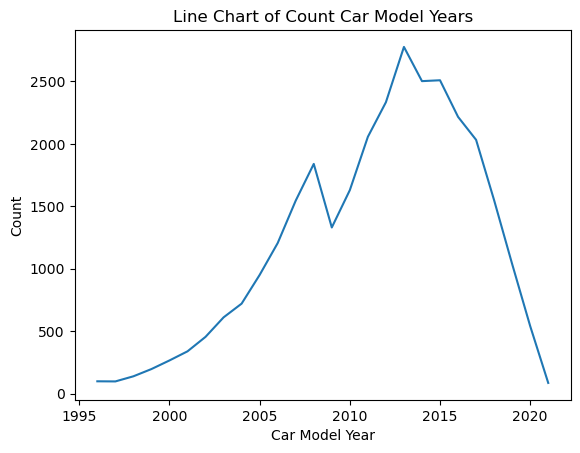

In [26]:
count_newer_cars.plot()
plt.title("Line Chart of Count Car Model Years")
plt.xlabel("Car Model Year")
plt.ylabel("Count")
plt.show()

In [27]:
count_by_price = newer_vehicles_df.groupby(["price"])["price"].count()
#count_by_price

In [28]:
# let's see the list of prices and how often they occur
# I removed cars priced at $1 because the count (683) was much higher than the next highest (373 & 372)
#count_by_price.sort_values(ascending=False)

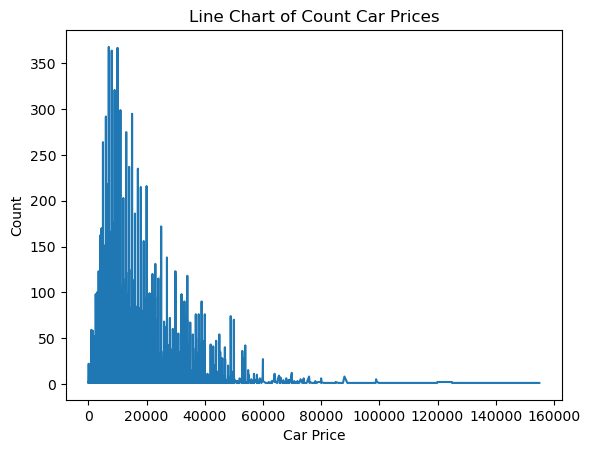

In [29]:
count_by_price.plot()
plt.title("Line Chart of Count Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Count")
plt.show()

In [30]:
count_by_model_year_milage = newer_vehicles_df.groupby(["model_year","odometer"])["odometer"].count()
#count_by_model_year_milage

In [31]:
sort_newer_vehicles_df = newer_vehicles_df.sort_values(["model_year","odometer"])
sort_newer_vehicles_df.head()

id               region  price manufacturer           model  \
319428  7314535795      medford-ashland  24500        rover       discovery   
279846  7305494515            rochester  26000    chevrolet  corvette coupe   
189227  7313073284          south coast  13000   mitsubishi          3000gt   
351059  7312080297  sioux falls / SE SD  51500      porsche             911   
379410  7315994375     odessa / midland  15000         ford            f700   

        condition    cylinders    fuel  odometer title_status transmission  \
319428       good  4 cylinders  diesel     150.0        clean       manual   
279846   like new  8 cylinders     gas   33278.0        clean       manual   
189227   like new  6 cylinders     gas   47023.0        clean       manual   
351059  excellent  6 cylinders     gas   49073.0        clean       manual   
379410       good  8 cylinders     gas   52686.0        clean       manual   

                      VIN drive       size         type paint_color state  \
319428  SALJY1289TA521327   4wd  full-size          SUV       black    or   
279846  1G1YY2258T5113641   rwd  full-size        coupe      silver    ny   
189227  JA3AM84J9TY001114   fwd   mid-size        coupe         red    ma   
351059  WPOCA2999TS340876   4wd    compact  convertible         red    sd   
379410  1FDWF70J2TVA06458   rwd  full-size        truck       white    tx   

        model_year  
319428        1996  
279846        1996  
189227        1996  
351059        1996  
379410        1996

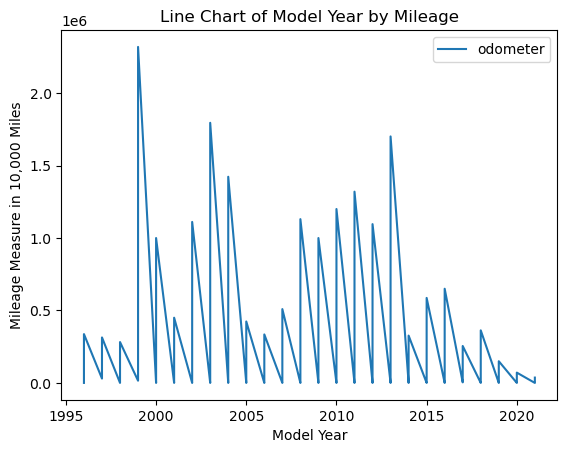

In [32]:
sort_newer_vehicles_df.plot(x="model_year",y="odometer")
plt.title("Line Chart of Model Year by Mileage")
plt.xlabel("Model Year")
plt.ylabel("Mileage Measure in 10,000 Miles")
plt.show()

In [33]:
# let's write a common function that can be reused to draw pie charts.
# the data source will be the same, so we just need to pass in the name of the column and a title
#
def pie_chart(what,title):
    pie_filling = newer_vehicles_df.groupby([what])[what].count().sort_values(ascending=False)
    slice_of_pie = pd.DataFrame(pie_filling).rename(columns={what:what+'_count'})
    slice_of_pie.unstack(level=0).plot(
        kind='pie',
        stacked=False,
        subplots=False,
        autopct='%1.1f%%',
        figsize=(7, 7),labels = list(pie_filling.index.values)
        )
    plt.title(title)
    plt.show()

In [34]:
# let's write a common function that can be reused to scatter plots.
# the data source will be the same, so we just need to pass in the name of the column and a title
#
def plt_scatter(xaxis,yaxis,xlabel,ylabel,title,colors):
    plt.scatter(
        x=newer_vehicles_df[xaxis],
        y=newer_vehicles_df[yaxis],
        c=colors
        )
    if xlabel == "":
        xlabel = xaxis.title()
    if ylabel == "":
        ylabel = yaxis.title()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

In [35]:
def px_scatter_plot(xaxis,yaxis,xlabel,ylabel,title,colors):
    fig = px.scatter(newer_vehicles_df,
                     x=xaxis,
                     y=xaxis, 
                     color=colors)
    if xlabel == "":
        xlabel = xaxis.title()
    if ylabel == "":
        ylabel = yaxis.title()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    fig.show()

In [36]:
def sns_scatter_plot(xaxis,yaxis,xlabel,ylabel,title,colors):
    sns.scatterplot(x=xaxis,
                    y=yaxis,
                    data=newer_vehicles_df,
                    hue=colors,
                    alpha=1.0)
    if xlabel == "":
        xlabel = xaxis.title()
    if ylabel == "":
        ylabel = yaxis.title()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

In [37]:
def sns_scatter_plot_cond(cond,xaxis,yaxis,xlabel,ylabel,title,colors):
    sns.scatterplot(x=xaxis,
                    y=yaxis,
                    data=cond,
                    hue=colors,
                    alpha=1.0)
    if xlabel == "":
        xlabel = xaxis.title()
    if ylabel == "":
        ylabel = yaxis.title()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

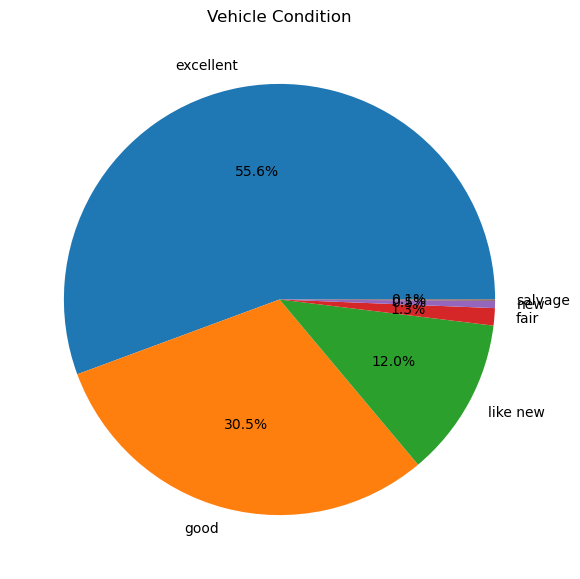

In [38]:
# The condition feature predominately "excellent, good, like new"
# I will keep the remaining values because they aren't too significant
pie_chart("condition","Vehicle Condition")

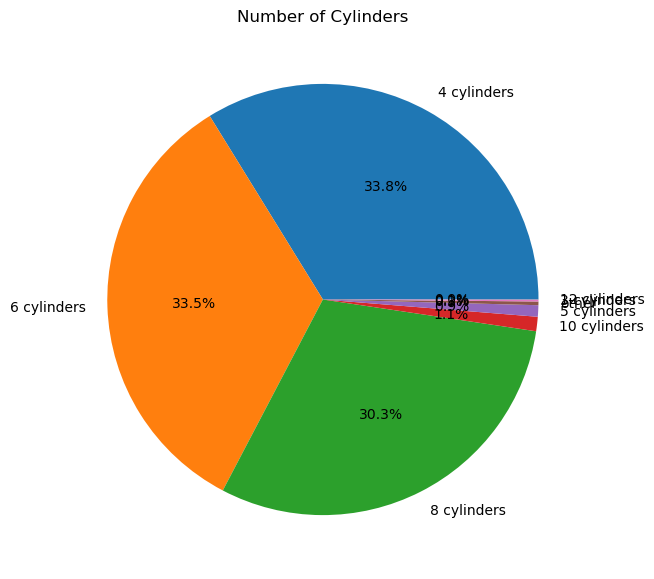

In [39]:
# The 4, 6, 8 cylinder cars are predominately featured in this dataset
# The others will remain because they aren't too significant
pie_chart("cylinders","Number of Cylinders")

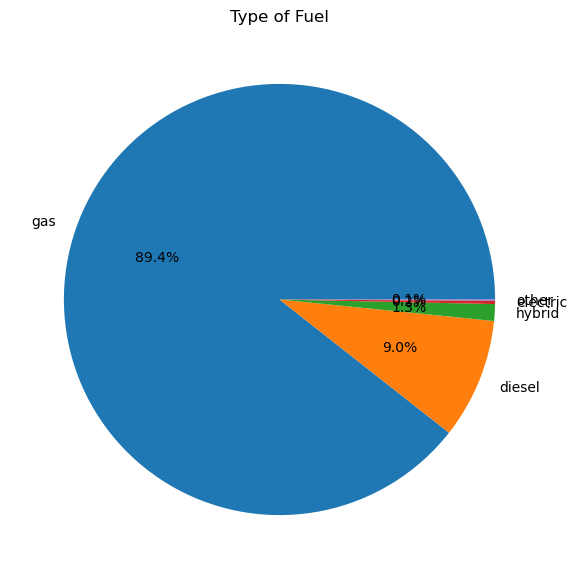

In [40]:
# gas Vehicles dominate this dataset, followed by deisel
# The other types are insignificant and will remain in the dataset
pie_chart("fuel","Type of Fuel")

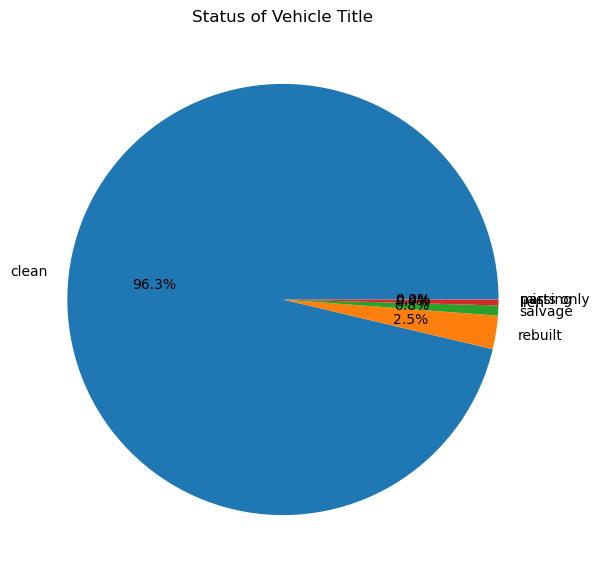

In [41]:
# clean Titles are the most dominant
# The other types are insignificant and will remain in the dataset
pie_chart("title_status","Status of Vehicle Title")

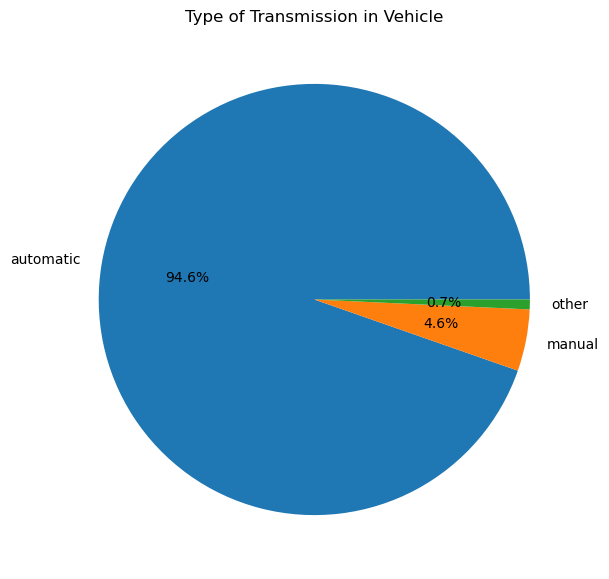

In [42]:
# Vehicles with automatic transmissions are the most dominant
# The other types are insignificant and will remain in the dataset
pie_chart("transmission","Type of Transmission in Vehicle")

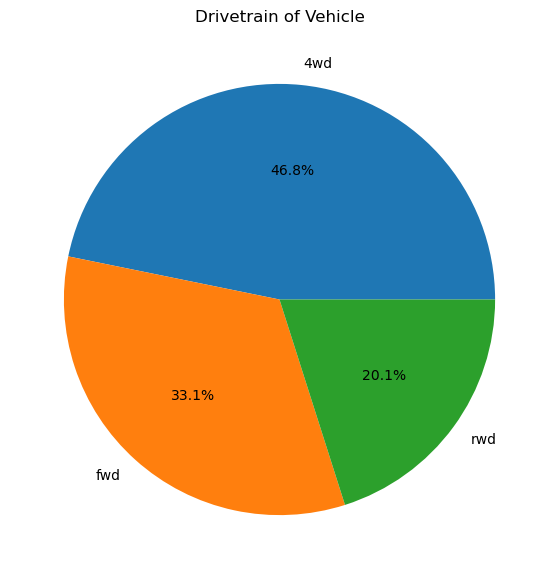

In [43]:
# The distribution of drive types aren't even, but could be a useful feature
pie_chart("drive","Drivetrain of Vehicle")

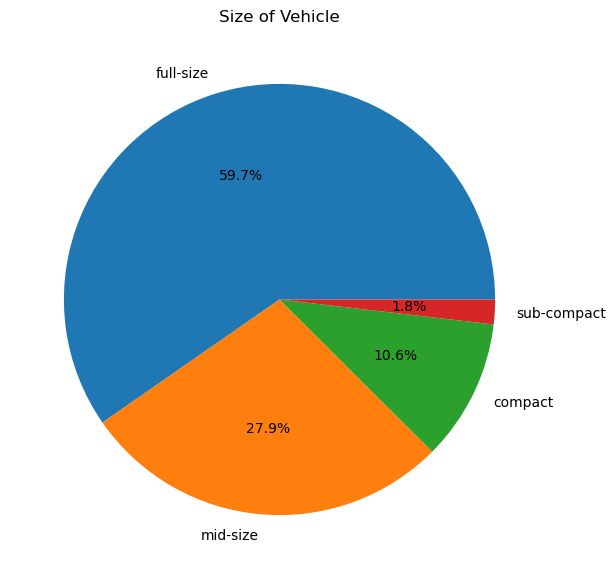

In [44]:
# full-size and mid-size vehicles 
pie_chart("size","Size of Vehicle")

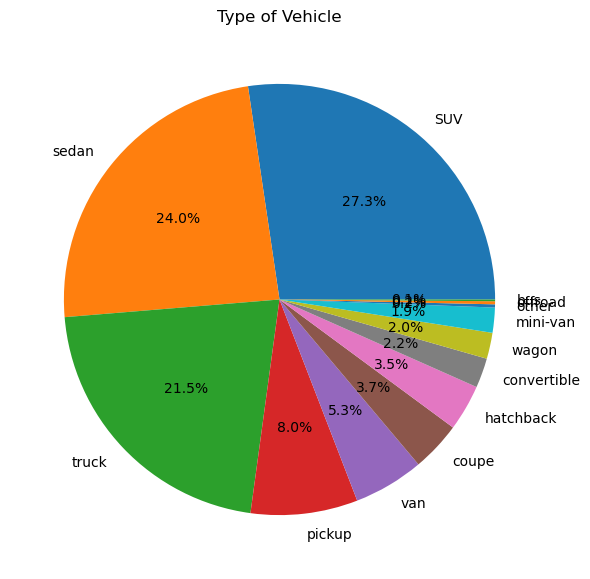

In [45]:
pie_chart("type","Type of Vehicle")

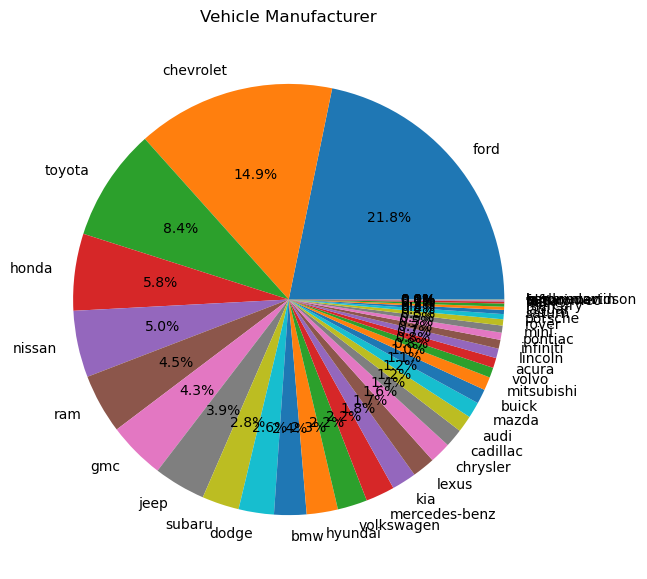

In [46]:
pie_chart("manufacturer","Vehicle Manufacturer")

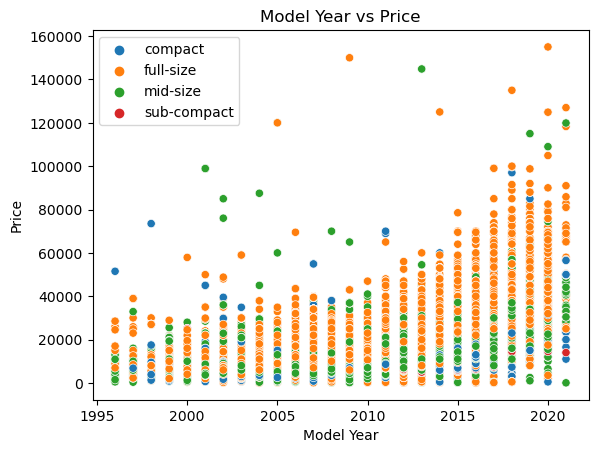

In [47]:
sns_scatter_plot("model_year","price","Model Year","","Model Year vs Price","size")

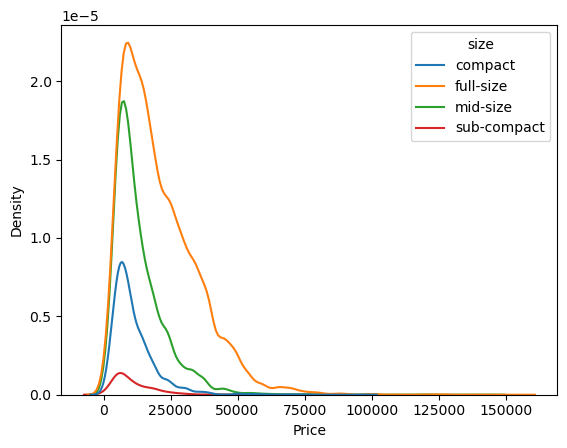

In [48]:
#price_df = newer_vehicles_df[newer_vehicles_df["price"] < 75000]
#sns.kdeplot(data=price_df, x="price", hue="size")
sns.kdeplot(data=newer_vehicles_df, x="price", hue="size")
plt.xlabel("Price")
plt.title("")
plt.show()

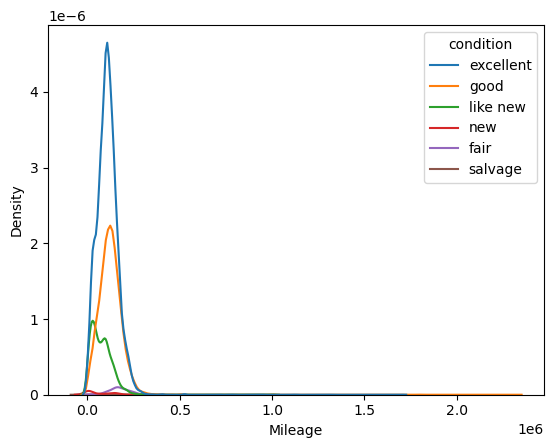

In [49]:
#mileage_df = newer_vehicles_df[newer_vehicles_df["odometer"] < 50000]
#sns.kdeplot(data=mileage_df, x="odometer", hue="condition")
sns.kdeplot(data=newer_vehicles_df, x="odometer", hue="condition")
plt.xlabel("Mileage")
plt.title("")
plt.show()

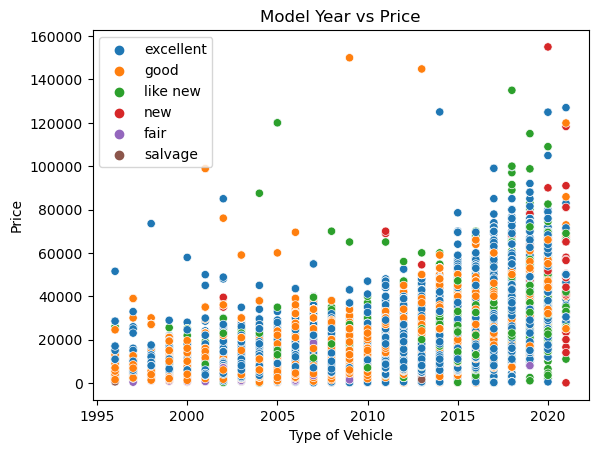

In [51]:
sns_scatter_plot("model_year","price","Type of Vehicle","","Model Year vs Price","condition")

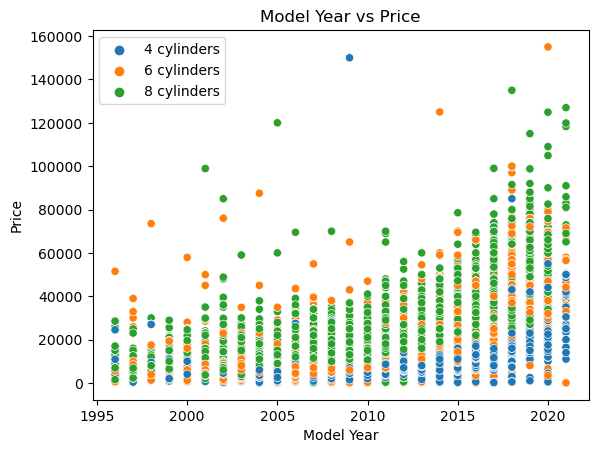

In [52]:
cond = newer_vehicles_df.query("cylinders in ['4 cylinders','6 cylinders','8 cylinders']")
sns_scatter_plot_cond(cond,"model_year","price","Model Year","","Model Year vs Price","cylinders")

In [53]:
size_cond_cyl_df = newer_vehicles_df[["model_year","size","condition","cylinders","price","odometer"]]
size_cond_cyl_df.head()

model_year       size  condition    cylinders  price  odometer
215        2002    compact  excellent  4 cylinders   4000  155000.0
268        2008    compact  excellent  4 cylinders   9000   56700.0
337        2011  full-size  excellent  6 cylinders   8950  164000.0
346        2001   mid-size       good  8 cylinders  98900   20187.0
355        2008  full-size       good  6 cylinders   9400  129473.0

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.